## Problem set 1, Applications of Natural Language Processing, Spring 2026

#### Due Tuesday February 24 on Gradescope. Please see detailed submission instructions below.  120 points total.

##### How to do this problem set:

- Use Python version 3.  We strongly suggest installing Python from the [Anaconda Individual Edition](https://docs.anaconda.com/anaconda/) software package.

- If you are on Windows, you will need to install a package to use Unix commands. We suggest [Windows Subsystem for Linux](https://learn.microsoft.com/en-us/windows/wsl/install) or [Cygwin](https://www.cygwin.com).

- Download [`large_movie_review_dataset.zip`](https://drive.google.com/file/d/1YfrrJkwZXk8qJiq7PDD_UqJ3qWowA2Pu/view?usp=drive_link). and also `lotr_script.txt` (in this zip file). We will use these two datasets in this homework. The first dataset may take a long time to unzip. 

- Most of these questions require writing Python code or Unix commands and computing results, while the remainder have textual answers. To complete this assignment, you will need to fill out the supporting files, `hw1.py` and `hw1.sh`.

- For all of the textual answers, replace the placeholder text ("Answer in one or two sentences here.") with your answer.

- This assignment is designed so that you can run all cells in a few minutes of computation time. If it is taking longer than that, you probably have a mistake in your code.

##### How to submit this problem set:
- Write all the answers in this ipython notebook. Once you are finished, (1) Generate a PDF via (File -> Download As -> PDF)  (2) Upload your pdf file to Gradescope.  (3) Compress `hw1.py`, `hw1.sh`, and `hw1.ipynb` into one zip file and upload to Gradescope.

- **Important:** Check your PDF before you turn it in to gradescope to make sure it exported correctly. If ipython notebook gets confused about your syntax it will sometimes terminate the PDF creation routine early. You are responsible for checking for these errors. If your whole PDF does not print, try running on the commandline `jupyter nbconvert --to pdf hw1.ipynb` to identify and fix any syntax errors that might be causing problems.

- **Important:** When creating your final version of the PDF to hand in, please do a fresh restart and execute every cell in order. Then you'll be sure it's actually right. One convenient way to do this is by clicking `Cell -> Run All` in the notebook menu.

- If you are having trouble with PDF export, you can always paste screenshots into a word processor then turn that into PDF.


##### Academic honesty:
- Like always, check the course's collaboration policy -- see the syllabus (on Canvas): all of the content you submit, both code and text, needs to be produced independently; do not share code or written materials, and list anyone you worked with for discussions.  We will check code for plagiarism and we will follow up collaboration policy violations with the university’s Academic Honesty Policy and Procedures.

This homework was originally created by Brendan O'Connor.

In [1]:
# Run this cell! It sets some things up for you.

# This code makes plots appear inline in this document rather than in a new window.
import matplotlib.pyplot as plt
import os

# This code imports your work from hw1.py
from hw1 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 4) # set default size of plots

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# download the IMDB large movie review corpus to a file location on your computer

PATH_TO_DATA = '/home/chakew/Downloads/spring_2026/cs485/hw1/large_movie_review_dataset'  # set this variable to point to the location of the IMDB corpus on your computer
POS_LABEL = 'pos'
NEG_LABEL = 'neg'
TRAIN_DIR = os.path.join(PATH_TO_DATA, "train")
TEST_DIR = os.path.join(PATH_TO_DATA, "test")

for label in [POS_LABEL, NEG_LABEL]:
    if len(os.listdir(TRAIN_DIR + "/" + label)) == 12500:
        print("Great! You have 12500 {} reviews in {}".format(label, TRAIN_DIR + "/" + label))
    else:
        print("Oh no! Something is wrong. Check your code which loads the reviews")

Great! You have 12500 pos reviews in /home/chakew/Downloads/spring_2026/cs485/hw1/large_movie_review_dataset/train/pos
Great! You have 12500 neg reviews in /home/chakew/Downloads/spring_2026/cs485/hw1/large_movie_review_dataset/train/neg


In [3]:
# Actually reading the data you are working with is an important part of NLP! Let's look at one of these reviews

print (open(TRAIN_DIR + "/neg/3740_2.txt").read())

Right away, this film was ridiculous. Not that it didn't have redeeming aspects For example, the best thing about this film was the beautiful background scenery. Anyone not living on the East Coast should know the South doesn't have beautiful mountains like those found in the West. I knew it was Utah right off the bat, but perhaps Dalton couldn't suppress his English accent, so they had to excuse it by saying this was a southern town. Subverting his accent into a Southern one was easier. Sure the film has plot twists, but its phony sense of place was something I couldn't get past. It's not like Utah doesn't have meth labs... so why the writers thought it necessary to pretend it was in the South is beyond me. <br /><br />One other thing in action pictures always puzzles me. Why do they always make the "cocking" sound effect when the character pulls out an automatic handgun? It seemed every other sound effect in this movie was a "chuk-chich" signifying a 9mm was loaded and ready to fire

## Part One: Intro to NLP in Python: types, tokens and Unix commands

### Types and tokens

One major part of any NLP project is word tokenization. Word tokenization is the task of segmenting text into individual words, called tokens. In this assignment, we will use simple whitespace tokenization. You will have a chance to improve this for extra credit at the end of the assigment. Take a look at the `tokenize_doc` function in `hw1.py`. **You should not modify tokenize_doc** but make sure you understand what it is doing.

In [4]:
# We have provided a tokenize_doc function in hw1.py. Here is a short demo of how it works

d1 = "This SAMPLE doc has   words tHat  repeat repeat"
bow = tokenize_doc(d1)

assert bow['this'] == 1
assert bow['sample'] == 1
assert bow['doc'] == 1
assert bow['has'] == 1
assert bow['words'] == 1
assert bow['that'] == 1
assert bow['repeat'] == 2

bow2 = tokenize_doc("Computer science is both practical and abstract.")
for b in bow2:
    print(b)

computer
science
is
both
practical
and
abstract.


**Question 1.1 (5 points)**

Now we are going to count the word types and word tokens in the corpus. In the cell below, use the `word_counts` dictionary variable to store the count of each word in the corpus.
Use the `tokenize_doc` function to break documents into tokens. 

`word_counts` keeps track of how many times a word type appears across the corpus. For instance, `word_counts["dog"]` should store the number 990 -- the count of how many times the word `dog` appears in the corpus.

In [5]:
import glob
import codecs
from collections import defaultdict, Counter
word_counts = Counter() # Counters are often useful for NLP in python. Similar to dicts (you can also use those)

for label in [POS_LABEL, NEG_LABEL]:
    for directory in [TRAIN_DIR, TEST_DIR]:
        for fn in glob.glob(directory + "/" + label + "/*.txt"):
            doc = open(fn, 'r', encoding='utf8') # Open the file with UTF-8 encoding
            text = doc.read()
            bow = tokenize_doc(text)
            word_counts.update(bow)
            doc.close()

In [6]:
if word_counts["movie"] == 61492:
    print ("yay! there are {} total instances of the word type movie in the corpus".format(word_counts["movie"]))
else:
    print ("hmm. Something seems off. Double check your code")


yay! there are 61492.0 total instances of the word type movie in the corpus


**Question 1.2 (5 points)**

Fill out the functions `n_word_types` and `n_word_tokens` in `hw1.py`. These functions return the total number of word types and tokens in the corpus. **important** The autoreload "magic" that you setup early in the assignment should automatically reload functions as you make changes and save. If you run into trouble you can always restart the notebook and clear any .pyc files.

In [7]:
print ("there are {} word types in the corpus".format(n_word_types(word_counts)))
print ("there are {} word tokens in the corpus".format(n_word_tokens(word_counts)))

there are 390931 word types in the corpus
there are 11557847.0 word tokens in the corpus


What is the difference between word types and tokens? Why are the number of tokens much higher than the number of types?

***Answer in one or two sentences here.***

*Answer:*
Word Type: Only store unique words, don't count duplicate words.
Word Tokens: Store any Words, count duplicate words.

*Proof:*

Statement: Number of tokens much higher than the number of types.

For any instance, we have $N$ tokens and $V$ types, for any types we choose the first position in the instance, thus we have $V$ distinct types, so we can conclude that: $N \ge V$ 

**Question 1.3 (5 points)**

Using `word_counts` dictionary you just created, make a new list of (word,count) pairs called `sorted_list` where tuples are sorted according to counts, in decending order. Then print the first 30 values from `sorted_list`.

In [8]:
# IMPLEMENT ME!
import operator
sorted_list = sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True)

print(sorted_list[:30])

[('the', 638861.0), ('a', 316615.0), ('and', 313637.0), ('of', 286661.0), ('to', 264573.0), ('is', 204876.0), ('in', 179807.0), ('i', 141587.0), ('this', 138483.0), ('that', 130140.0), ('it', 129614.0), ('/><br', 100974.0), ('was', 93258.0), ('as', 88242.0), ('with', 84590.0), ('for', 84510.0), ('but', 77864.0), ('on', 62890.0), ('movie', 61492.0), ('are', 57009.0), ('his', 56870.0), ('not', 56765.0), ('you', 55600.0), ('film', 55086.0), ('have', 54423.0), ('he', 51062.0), ('be', 50901.0), ('at', 45259.0), ('one', 44983.0), ('by', 43359.0)]


### Unix Text Processing

In this part, you will practice extracting and processing information from text with Unix commands. The file `lotr_script.txt` is included with the zip file for this homework. This text file corresponds to the movie script of *The Fellowship of the Rings* (2001). This script comes from a larger corpus of movie scripts, the [ScriptBase-J](https://github.com/EdinburghNLP/scriptbase) corpus.

First, let's open and examine `lotr_script.txt`.

**Question 1.4 (5 points)**

Describe the structure of this script. How are roles, scene directions, and dialogue organized?

***Answer in one or two sentences here.***

This script typically begins with transition marks, introducing the location and time of the scene, followed by actions, shots, and time sequences to set the stage, and the dialogue usually begins with the character's name centered, followed by their lines.

Now that we've identified this file's structure, let's use Unix commands to process & analyze its contents.

You may want to take revisit the optional reading Ken Church, "Unix for Poets", available on Canvas under "Files" -> "Lectures" -> "1-normalization".

**Question 1.5 (5 points)**

Use Unix commands to print the name of each character with dialogue in the script, one name per line. This script's text isn't perfect, so expect a few additional names.

Implement this in `hw1.sh`. Then, copy your implementation and its resulting output into the following two cells.

In [9]:
***Copy Unix commands here***

grep -E "^[[:space:]]{10,}[A-Z][A-Z0-9 .,'-]*([[:space:]]*\\([^)]*\\))?[[:space:]]*$" lotr_script.txt |
	sed -E 's/^ +//; s/ *\([^)]*\)//g; s/ +$//; s/  +/ /g' |
	sort -u


SyntaxError: invalid syntax (297198670.py, line 1)

In [10]:
***Copy output here***
Question 1.5
ARAGORN
ARWEN
BILBO
BLACK RIDER
BOROMIR
BUTTERBUR
CELEBORN
ELROND
FARMER MAGGOT
FRO DO
FRODO
FRODO DISAPPEARS
GALADRIEL
GANDALF
GATEKEEPER
GIMLI
GOLLUM
HALDIR
HOBBIT BOUNDER
ISILDUR
LEGOLAS
LURTZ
MERRY
ODO PROUDFOOT
ORC OVERSEER
PIPPIN
SAM
SARUMAN
STRIDER
WITCH KING

SyntaxError: invalid syntax (738548914.py, line 1)

**Question 1.6 (5 points)**

Now, let's extract and analyze the *dialogue* of this script using Unix commands

First, extract all lines of dialogue in this script.
Then, normalize and tokenize this text such that all alphabetic characters are converted to lowercase and words are sequences of alphabetic characers.
Finally, print the top-20 most frequent word types and their corresponding counts.

Hint: Ignore parantheticals. These contain short stage directions.


Implement this in `hw1.sh`. Then, copy your implementation and its resulting output into the following two cells.

In [11]:
***Copy Unix commands here***
awk '
BEGIN{d=0}
{
  if (match($0,/^[[:space:]]+/) && RLENGTH>=10) {
    name = substr($0, RLENGTH+1)
    if (name ~ /^[A-Z][A-Z0-9 .-]*(\([^)]*\))?[[:space:]]*$/) {
      d=1; next
    }
  }
}
d && /^[[:space:]]*$/ { d=0; next }
d {
  line=$0
  sub(/^[[:space:]]+/, "", line)
  if (line ~ /^\(/) next
  print $0
}
' lotr_script.txt |
	tr 'A-Z' 'a-z' |
	grep -oE '[a-z]+' |
	sort |
	uniq -c |
	sort -nr |
	head -20

SyntaxError: unterminated string literal (detected at line 2) (1343290055.py, line 2)

In [12]:
***Copy output here***
Question 1.6
    462 the
    266 you
    242 i
    231 of
    212 to
    192 it
    151 and
    148 is
    144 a
    137 s
    133 frodo
     99 we
     91 in
     86 my
     80 not
     79 he
     78 what
     78 have
     77 that
     75 will

SyntaxError: invalid syntax (1204445564.py, line 1)

**Question 1.7 (5 points)**

If we instead tokenized *all* text in the script, how might the results from Question 1.6 to change? Are there specific word types that might become more frequent?


***Answer in one or two sentences here.***

Word frequency will likely point to directional words, like cut, night, day, scene, and camera becoming more frequent, while dialogue pronouns will be relatively less dominant.

## Zipf's Law

**Question 1.8 (10 points)**

In this section, you will verify a key statistical properties of text: [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law).

Zipf's Law describes the relations between the frequency rank of words and frequency value of words.  For a word $w$, its frequency is inversely proportional to its rank:

$$count_w = K \frac{1}{rank_w}$$

$K$ is a constant, specific to the corpus and how words are being defined.

***What would this look like if you took the log of both sides of the equation?***

* ***Write your answer in one or two lines here.***

$$log(count_w) = log(K) - log(rank_w)$$


Therefore, if Zipf's Law holds, after sorting the words descending on frequency, word frequency decreases in an approximately linear fashion under a log-log scale.

***Now, please make log-log plots for both corpora. On each, plot the log-rank versus log-frequency.***  
Then make a plot for the movie reviews corpus.  Then make a plot for the script.  For this question, use the same Python-based analysis for both, so they're comparable.  *Hint:* Make use of a sorted list of .items() from the word counts dictionary or Counter.

*Please remember to label the meaning of the x-axis and y-axis, and give a title to make clear which corpus is being shown.*

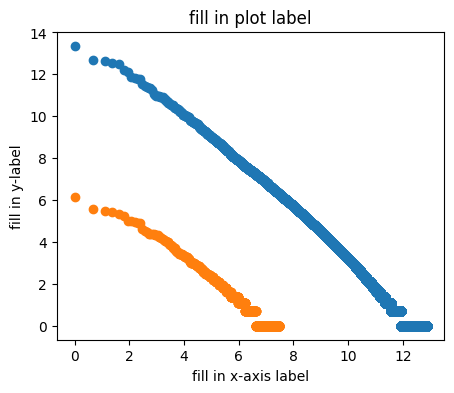

In [13]:
# plotting starter code; for just one plot. change everything
import subprocess, ast
from collections import Counter

def extract_hw1_sh(sh_path="hw1.sh"):
    out = subprocess.check_output(["bash", sh_path], text=True) # Run hw1.sh and get output
    list_line = next(line for line in out.splitlines() if line.lstrip().startswith("[")) # lstrip => 去除前面的空格
    pairs = ast.literal_eval(list_line)     
    return Counter(dict(pairs))             
    
import numpy as np
def make_graph(word_counts):
    sorted_list = sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True)
    words = [w for (w, _) in sorted_list]
    counts = [c for (_, c) in sorted_list]
    rank = list(range(1, len(words) + 1))
    x = np.log(rank)
    y = np.log(counts)
    plt.scatter(x, y)
    plt.xlabel("fill in x-axis label")
    plt.ylabel("fill in y-label")
    plt.title("fill in plot label")
    
make_graph(word_counts)
make_graph(extract_hw1_sh("hw1.sh"))



**Extra credit:**  Try making a Zipf plot on bigrams, that is, where you take counts of pairs of neighboring words, instead of counting individual words.  (For example, "I loved the movie" has the bigrams "I_loved", "loved_the", and "the_movie").  What changes or stays the same?  Does the result appear to follow Zipf's law?

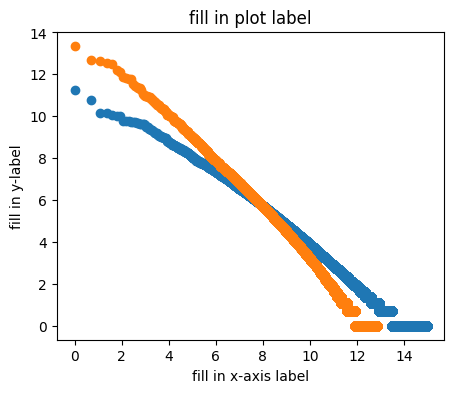

In [14]:
def pair_tokenize(doc):
    token = doc.split()
    lowered_tokens = list(map(lambda t: t.lower(), token))
    pair_token = [lowered_tokens[i] + "_" + lowered_tokens[i+1] for i in range(len(token) - 1)]
    return pair_token

word_counts_1 = Counter() # Counters are often useful for NLP in python. Similar to dicts (you can also use those)
pair_counts = Counter()

for label in [POS_LABEL, NEG_LABEL]:
    for directory in [TRAIN_DIR, TEST_DIR]:
        for fn in glob.glob(directory + "/" + label + "/*.txt"):
            doc = open(fn, 'r', encoding='utf8') # Open the file with UTF-8 encoding
            text = doc.read()
            bow_1 = tokenize_doc(text)
            word_counts_1.update(bow_1)
            pair_counts.update(pair_tokenize(text))
            doc.close()

make_graph(pair_counts)
make_graph(word_counts_1)

## Part Two: Naive Bayes

This section of the homework will walk you through coding a Naive Bayes classifier that can distinguish between postive and negative reviews (at some level of accuracy).

**Question 2.1 (5 pts)** To start, implement the `update_model` function and `tokenize_and_update_model` function in `hw1.py`. Make sure to read the function comments so you know what to update. Also review the NaiveBayes class variables in the `def __init__` method of the NaiveBayes class  to get a sense of which statistics are important to keep track of. Once you have implemented `update_model` and `tokenize_and_update_model`, run the train model function using the code below. You’ll need to provide the path to the dataset you downloaded to run the code.

In [15]:
nb = NaiveBayes(PATH_TO_DATA, tokenizer=tokenize_doc)
nb.train_model()

if len(nb.vocab) == 251637:
    print("Great! The vocabulary size is {}".format(251637))
else:
    print("Oh no! Something seems off. Double check your code before continuing. Maybe a mistake in update_model?")

REPORTING CORPUS STATISTICS
NUMBER OF DOCUMENTS IN POSITIVE CLASS: 12500.0
NUMBER OF DOCUMENTS IN NEGATIVE CLASS: 12500.0
NUMBER OF TOKENS IN POSITIVE CLASS: 2958832.0
NUMBER OF TOKENS IN NEGATIVE CLASS: 2885848.0
VOCABULARY SIZE: NUMBER OF UNIQUE WORDTYPES IN TRAINING CORPUS: 251637
Great! The vocabulary size is 251637


### Exploratory analysis

Let’s begin to explore the count statistics stored by the update model function. Implement `top_n` function in the Naive Bayes Block to find the top 10 most common words in the positive class and top 10 most common words in the negative class.

In [16]:
print("TOP 10 WORDS FOR CLASS " + POS_LABEL + ":")
for tok, count in nb.top_n(POS_LABEL, 10):
    print('', tok, count)
print()

print("TOP 10 WORDS FOR CLASS " + NEG_LABEL + ":")
for tok, count in nb.top_n(NEG_LABEL, 10):
    print('', tok, count)
print()

TOP 10 WORDS FOR CLASS pos:
 the 165805.0
 and 87029.0
 a 82055.0
 of 76155.0
 to 65869.0
 is 55785.0
 in 48422.0
 i 33143.0
 it 32802.0
 that 32705.0

TOP 10 WORDS FOR CLASS neg:
 the 156393.0
 a 77898.0
 and 71543.0
 of 68307.0
 to 68098.0
 is 48386.0
 in 42105.0
 i 37337.0
 this 37301.0
 that 33587.0



**Question 2.2 (5 points)**

What is the first thing that you notice when you look at the top 10 words for the 2 classes? Are these words helpful for discriminating between the two classes? Do you imagine that processing other English text will result in a similar phenomenon? What about other languages?

***Answer in one or two lines here.***

These are mostly high-frequency, commonly used words, such as one, on, have, for… Both sides are similar, making it difficult to distinguish between positive and negative categories.

This is also common in Chinese; in novels, the most frequent words are ordinary words.


**Question 2.3 (5 pts)**

The Naive Bayes model assumes that all features are conditionally independent given the class label. For our purposes, this means that the probability of seeing a particular word in a document with class label $y$ is independent of the rest of the words in that document. Implement the `p_word_given_label` function. This function calculates P (w|y) (i.e., the probability of seeing word w in a document given the label of that document is y).

Use your `p_word_given_label` function to compute the probability of seeing the word “amazing” given each sentiment label. Repeat the computation for the word “dull.” 

In [17]:
print("P('amazing'|pos):",  nb.p_word_given_label("amazing", POS_LABEL))
print("P('amazing'|neg):",  nb.p_word_given_label("amazing", NEG_LABEL))
print("P('dull'|pos):",  nb.p_word_given_label("dull", POS_LABEL))
print("P('dull'|neg):",  nb.p_word_given_label("dull", NEG_LABEL))
dull_neg = nb.p_word_given_label("dull", NEG_LABEL)

P('amazing'|pos): 0.00026158970837141145
P('amazing'|neg): 7.207586816769282e-05
P('dull'|pos): 3.278320634628799e-05
P('dull'|neg): 0.00014311218054450546


Which word has a higher probability given the positive class, fantastic or boring? Which word has a higher probability given the negative class? Is this what you would expect?

***Answer in one or two lines here.***

Higher probability given the positive class: fantastic

Higher probability given the negative class: boring

Yes


**Question 2.4 (5 pts)**

In the next cell, compute the probability of the word "car-thievery" in the positive training data and negative training data.

In [18]:
import numpy as np
print("car-thievery" in nb.vocab)
x = nb.p_word_given_label("car-thievery", NEG_LABEL)
print("P('car-thievery'|pos):",  nb.p_word_given_label("car-thievery", POS_LABEL))
print("P('car-thievery'|neg):",  x)
print(np.log(x))
print(x*dull_neg)

True
P('car-thievery'|pos): 3.37971199446268e-07
P('car-thievery'|neg): 0.0
-inf
0.0


/tmp/ipykernel_31946/3722688042.py:6: RuntimeWarning: divide by zero encountered in log
  print(np.log(x))


What is unusual about P('car-thievery'|neg)? What would happen if we took the log of "P('car-thievery'|neg)"? What would happen if we multiplied "P('car-thievery'|neg)" by "P('dull'|neg)"? Why might these operations cause problems for a Naive Bayes classifier?

***Answer in one or two lines here.*** 

Unusual: $P('car-thievery'|neg)=0$

Log: $np.log(P('car-thievery'|neg))=-inf$

Multiplied "P('car-thievery'|neg)" by "P('dull'|neg)" = 0.0

Because car-thievery never appears in the neagtive text, the result of P('car-thievery'|neg) is zero.

**Question 2.5 (5 pts)**

We can address the issues from question 2.4 with add-$\alpha$ smoothing (like add-1 smoothing except instead of adding 1 we add $\alpha$). Implement
`p_word_given_label_and_alpha` in the `Naive Bayes Block` and then run the next cell. Hint: look at the slides from the lecture on add-1 smoothing.

In [19]:
print("P('stop-sign.'|pos):",  nb.p_word_given_label_and_alpha("stop-sign.", POS_LABEL, 0.2))

P('stop-sign.'|pos): 6.646374399441918e-08


**Question 2.6 (5 pts) (getting ready for question 2.11)**

*Prior and Likelihood* 

As noted before, the Naive Bayes model assumes that all words in a document are independent of one another given the document’s label. Because of this we can write the likelihood of a document as:

$P(w_{d1},\cdots,w_{dn}|y_d) = \prod_{i=1}^{n}P(w_{di}|y_d)$

However, if a document has a lot of words, the likelihood will become extremely small and we’ll encounter numerical underflow. Underflow is a common problem when dealing with probabilistic models; if you are unfamiliar with it, you can get a brief overview on [Wikipedia](https:/en.wikipedia.org/wiki/Arithmetic_underflow). To deal with underflow, a common transformation is to work in log-space.

$\log[P(w_{d1},\cdots,w_{dn}|y_d)] = \sum_{i=1}^{n}\log[P(w_{di}|y_d)]$

Implement the `log_likelihood` function (Hint: it should make calls to the p word given label and alpha function).
Implement the `log_prior` function. This function takes a class label and returns the log of the fraction of the training documents that are of that label.

There is nothing to print out for this question. But you will use these functions in a moment...

**Question 2.7 (5 pts)**

Naive Bayes is a model that tells us how to compute the posterior
probability of a document being of some label (i.e.,
$P(y_d|\mathbf{w_d})$).  Specifically, we do so using Bayes' rule:

  $P(y_d|\mathbf{w_d}) = \frac{P(y_d)P(\mathbf{w_d}|y_d)}{P(\mathbf{w_d})}$

In the previous section you implemented functions to compute both
the log prior ($\log[P(y_d)]$) and the log likelihood
($\log[P( \mathbf{w_d} |y_d)]$ ). Now, all your missing is the
*normalizer*, $P(\mathbf{w_d})$.

Derive the normalizer by expanding $P(\mathbf{w_d})$. You will have to use "MathJax" to write out the equations. MathJax is very similar to LaTeX. 99% of the MathJax you will need to write for this course (and others at UMass) is included in the first answer of [this](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) tutorial. MathJax and LaTeX can be annoying first, but once you get a little practice, using these tools will feel like second nature.


Derive the normalizer by expanding $P(\mathbf{w_d})$. Fill out the answer with MathJax here

***Answer in one or two lines here.*** 

$$P(W_{d}) = \sum_{y\in \{POS\_LABEL, NEG\_LABEL\}}P(W_d, y)=P(W_d, POS\_LABEL)+P(W_d, NEG\_LABEL)=P(W_d | POS)P(POS) + P(W_d | NEG)P(NEG)$$

**Question 2.8 (5 pts)**

One way to classify a document is to compute the unnormalized log posterior for both labels and take the argmax (i.e., the label that yields the higher unnormalized log posterior). The unnormalized log posterior is the sum of the log prior and the log likelihood of the document. Why don’t we need to compute the log normalizer here?


***Answer in one or two lines here.*** 

We want to classify review w_d as either “pos” or “neg”. In both P(pos | w_d) and P(neg | w_d), the denominator P(w_d) is exactly the same number. 

**Question 2.9 (10 pts)**
As we saw earlier, the top 10 words from each class do not seem to tell us much about the classes. A much more informative metric, which in some ways the model actually directly uses, is the likelihood ratio, which is defined as

$LR(w)=\frac{P(w|y=\mathrm{pos})}{P(w|y=\mathrm{neg})}$

A word with LR=3 is 3 times more likely to appear in the positive class than in the negative. A word with LR 0.33 is one-third as likely to appear in the positive class as opposed to the negative class.

In [20]:
# Implement the nb.likelihood_ratio function and use it to investigate the likelihood ratio of "amazing" and "dull"
print ("LIKELIHOOD RATIO OF 'amazing':", nb.likelihood_ratio('amazing', 0.2))
print ("LIKELIHOOD RATIO OF 'dull':", nb.likelihood_ratio('dull', 0.2))
print ("LIKELIHOOD RATIO OF 'and':", nb.likelihood_ratio('and', 0.2))
print ("LIKELIHOOD RATIO OF 'to':", nb.likelihood_ratio('to', 0.2))

LIKELIHOOD RATIO OF 'amazing': 3.628350587556548
LIKELIHOOD RATIO OF 'dull': 0.22953174277018223
LIKELIHOOD RATIO OF 'and': 1.1869527527674362
LIKELIHOOD RATIO OF 'to': 0.9438077915764572


What is the minimum and maximum possible values the likelihood ratio can take? Does it make sense that $LR('amazing') > LR('to')$ ?

***Answer in one or two lines here.*** 

min = 0 when $P(w|y=pos) \rightarrow 0$ and $P(w|y=neg) \rightarrow 0 $

max = inf when $P(w|y=pos) \rightarrow \inf$ and $P(w|y=neg) \rightarrow 0$ 

Yes, amazing is a positive word in the text, so $LR("amazing") = 3.628350587556548$, while "to" is a common preposition, $LR("to") = 0.9438077915764572$

**Question 2.10 (5 pts)**

Find the word in the vocabulary with the highest likelihood ratio below.

In [21]:
# Implement me!
max_ll = 0
best_word = None
for w in nb.vocab:
    lr = nb.likelihood_ratio(w, 0.2)
    if lr > max_ll:
        max_ll = lr
        best_word = w
    
print("best_word:", best_word)
print("max_lr:", max_ll)

best_word: edie
max_lr: 401.0316267725798


**Question 2.11 (5 pts)**

Implement the `unnormalized_log_posterior` function and the `classify` function. The `classify` function should use the unnormalized log posteriors but should not compute the normalizer. Once you implement the `classify` function, we'd like to evaluate its accuracy. `evaluate_classifier_accuracy` is implemented for you so you don't need to change that method.

In [23]:
print(nb.evaluate_classifier_accuracy(0.2))

81.668


**Question 2.12 (5 pts)**

Try evaluating your model again with a smoothing parameter of 1000.

In [24]:
print(nb.evaluate_classifier_accuracy(1000.0))

75.9


Does the accuracy go up or down when alpha is raised to 1000? Why do you think this is?

***Answer in one or two lines here.***

No

I think the problem is when alpha is large, smoothing will make the conditional probability P(w|y) of each word very close to uniform, which will weaken the data's discriminative ability and worsen the classification performance.

**Question 2.13 (5 pts)** 

Find a review that your classifier got wrong. 

In [26]:
# in this cell, print out a review that your classifier got wrong. Print out the text of the review along with the label
alpha = 0.2  

pos_path = os.path.join(nb.test_dir, POS_LABEL)
neg_path = os.path.join(nb.test_dir, NEG_LABEL)

for p, true_label in [(pos_path, POS_LABEL), (neg_path, NEG_LABEL)]:
    for fname in os.listdir(p):
        with open(os.path.join(p, fname), "r") as doc:
            text = doc.read()
            bow = nb.tokenize_doc(text)
            pred = nb.classify(bow, alpha)

            if pred != true_label:
                print("FILE:", fname)
                print("TRUE:", true_label, "PRED:", pred)
                print("REVIEW TEXT:\n", text)
                raise SystemExit  # exit

FILE: 10009_10.txt
TRUE: pos PRED: neg
REVIEW TEXT:
 I loved this movie from beginning to end.I am a musician and i let drugs get in the way of my some of the things i used to love(skateboarding,drawing) but my friends were always there for me.Music was like my rehab,life support,and my drug.It changed my life.I can totally relate to this movie and i wish there was more i could say.This movie left me speechless to be honest.I just saw it on the Ifc channel.I usually hate having satellite but this was a perk of having satellite.The ifc channel shows some really great movies and without it I never would have found this movie.Im not a big fan of the international films because i find that a lot of the don't do a very good job on translating lines.I mean the obvious language barrier leaves you to just believe thats what they are saying but its not that big of a deal i guess.I almost never got to see this AMAZING movie.Good thing i stayed up for it instead of going to bed..well earlier than

SystemExit: 

/home/chakew/miniconda3/envs/torch-cu128/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3709: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


What are two reasons your system might have misclassified this example? What improvements could you make that may help your system classify this example correctly? 

***Answer in one or two lines here.*** 

For mathematical reasons, the model only considers words as independent and ignores negation and contrast (such as the weight of "blew me away / three thumbs up" may be diluted).

Add bigram (preceded text), negation and contrast features (such as "hate … but", "blew me away", "thumbs up").

**Question 2.14 (5 pts)**

Often times we care about multi-class classification rather than binary classification.

How many counts would we need to keep track of if the model were modified to support 5-class classification?

***Answer in one or two lines here.***

Five doc counts | Five word counts | $V$ types

$5\times V + 10$

**Extra credit (up to 10 points)**


If you don't want to do the extra credit, you can stop here! Otherwise... keep reading...
In this assignment, we use whitespace tokenization to create a bag-of-unigrams representation for the movie reviews. It is possible to improve this represetation to improve your classifier's performance. Use your own code or an external library such as nltk to perform tokenization, text normalization, word filtering, etc. Fill out your work in def tokenize_doc_and_more (below) and then show improvement by running the cells below.

Roughly speaking, the larger performance improvement, the more extra credit. We will also give points for the effort in the evaluation and analysis process. For example, you can split the training data into training and validation set to prevent overfitting, and report results from trying different versions of features. You can also provide some qualitative examples you found in the dataset to support your choices on preprocessing steps. Whatever you choose to try, make sure to describe your method and the reasons that you hypothesize for why the method works. You can use this ipython notebook to show your work. Be sure to explain what your code is doing in the notebook.

In [ ]:

# from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.snowball import SnowballStemmer 
from nltk.util import ngrams
stemmer = SnowballStemmer('english')
# stopset = set(stopwords.words('english'))
def tokenize_doc_and_more(doc): 
  """
  Return some representation of a document.
  At a minimum, you need to perform tokenization, the rest is up to you. 
  """
  # Implement me!
  bow = defaultdict(float)
  # your code goes here

  return bow

In [ ]:
nb = NaiveBayes(PATH_TO_DATA, tokenizer=tokenize_doc_and_more)
nb.train_model()
nb.evaluate_classifier_accuracy(1.0)


Use cells at the bottom of this notebook to explain what you did in better_tokenize_doc. Include any experiments or explanations that you used to decide what goes in your function. Doing a good job examining, explaining and justifying your work with small experiments and comments is as important as making the accuracy number go up!

In [ ]:
# Your experiments and explanations go here